In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure


# Gathering all data

In [4]:
result = pd.read_csv("../raw_data/df_data_weather.csv")
data = result.rename(columns={"Unnamed: 0":"Date"})
data = data.drop(0)
data = data.drop(1)
data = data.set_index("Date")
data.tail()

,temperature,precipitation,maxwind,condition,total_ttc,Order
Date,,,,,,
2021-10-25,13.2,0.0,7.6,Overcast,1633.6,77.0
2021-10-26,13.5,0.0,14.8,Cloudy,1206.5,58.0
2021-10-27,13.4,0.0,5.4,Partly cloudy,1033.5,54.0
2021-10-28,13.4,0.0,11.9,Partly cloudy,1257.0,60.0
2021-10-29,15.2,0.0,25.9,Partly cloudy,1319.0,62.0


In [7]:

data.index = pd.to_datetime(data.index,yearfirst=True)
result = data

## Adding day of week 

In [8]:
result['day_of_week0'] = result.index
result['day_of_week'] = result.day_of_week0.dt.dayofweek#.to_frame()
result = result.drop('day_of_week0', 1)
result.head(5)

/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_50368/1443071808.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  result = result.drop('day_of_week0', 1)


,temperature,precipitation,maxwind,condition,total_ttc,Order,day_of_week
Date,,,,,,,
2020-09-24,19.5,11.1,13.0,Light rain shower,599.5,22.0,3
2020-09-25,13.3,5.0,23.8,Light rain shower,1184.2,45.0,4
2020-09-26,10.4,5.9,20.9,Light rain shower,833.1,28.0,5
2020-09-27,8.5,13.2,9.4,Moderate rain,805.9,33.0,6
2020-09-28,12.5,7.1,10.1,Light drizzle,0.0,0.0,0


In [9]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False) # Instanciate encoder

ohe.fit(result[['day_of_week']]) # Fit encoder

dow_encoded = ohe.transform(result[['day_of_week']]) 

In [10]:
result["lundi"],result["mardi"],result['mercredi'],result['jeudi'],result['vendredi'],result['samedi'],result['dimanche'] = dow_encoded.T 
result = result.drop('day_of_week', 1)

/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_50368/1281879981.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  result = result.drop('day_of_week', 1)


In [11]:
result.head(5)


,temperature,precipitation,maxwind,condition,total_ttc,Order,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche
Date,,,,,,,,,,,,,
2020-09-24,19.5,11.1,13.0,Light rain shower,599.5,22.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-09-25,13.3,5.0,23.8,Light rain shower,1184.2,45.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-09-26,10.4,5.9,20.9,Light rain shower,833.1,28.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-09-27,8.5,13.2,9.4,Moderate rain,805.9,33.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-09-28,12.5,7.1,10.1,Light drizzle,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Datas for model

In [13]:
X = result.drop(['condition','total_ttc','Order'],1)
X


/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_50368/3753644158.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = result.drop(['condition','total_ttc','Order'],1)


,temperature,precipitation,maxwind,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche
Date,,,,,,,,,,
2020-09-24,19.5,11.1,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-09-25,13.3,5.0,23.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-09-26,10.4,5.9,20.9,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-09-27,8.5,13.2,9.4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-09-28,12.5,7.1,10.1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,13.2,0.0,7.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-10-26,13.5,0.0,14.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2021-10-27,13.4,0.0,5.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
y1 = result.total_ttc
y2 = result.Order

## Split 30% test

In [15]:
X_train = X[:"2021-07-01"]
X_train.shape

(281, 10)

In [16]:
X_test = X["2021-07-01":]
X_test.shape

(121, 10)

In [17]:
y2_train = y2[:"2021-07-01"]
y2_train.shape

(281,)

In [18]:
y2_test = y2["2021-07-01":]
y2_test.shape

(121,)

## FB prophet

In [19]:
from prophet import Prophet


In [25]:
m = Prophet()

df_train = result[:"2021-07-01"]
df_test = result["2021-07-01":]

In [23]:
df_train

,temperature,precipitation,maxwind,condition,total_ttc,Order,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche
Date,,,,,,,,,,,,,
2020-09-24,19.5,11.1,13.0,Light rain shower,599.50,22.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-09-25,13.3,5.0,23.8,Light rain shower,1184.20,45.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-09-26,10.4,5.9,20.9,Light rain shower,833.10,28.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2020-09-27,8.5,13.2,9.4,Moderate rain,805.90,33.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-09-28,12.5,7.1,10.1,Light drizzle,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-27,23.9,1.3,13.3,Patchy rain possible,774.10,36.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2021-06-28,24.5,1.0,13.0,Partly cloudy,1151.50,58.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-29,20.9,3.0,11.9,Light rain shower,1190.95,53.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_train["ds"] = df_train.index
df_train = df_train.reset_index()
df_train

/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_50368/2317358690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["ds"] = df_train.index


,Date,temperature,precipitation,maxwind,condition,total_ttc,Order,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche,ds
0,2020-09-24,19.5,11.1,13.0,Light rain shower,599.50,22.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2020-09-24
1,2020-09-25,13.3,5.0,23.8,Light rain shower,1184.20,45.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2020-09-25
2,2020-09-26,10.4,5.9,20.9,Light rain shower,833.10,28.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2020-09-26
3,2020-09-27,8.5,13.2,9.4,Moderate rain,805.90,33.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020-09-27
4,2020-09-28,12.5,7.1,10.1,Light drizzle,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-06-27,23.9,1.3,13.3,Patchy rain possible,774.10,36.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2021-06-27
277,2021-06-28,24.5,1.0,13.0,Partly cloudy,1151.50,58.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-06-28
278,2021-06-29,20.9,3.0,11.9,Light rain shower,1190.95,53.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2021-06-29
279,2021-06-30,20.0,0.3,5.4,Patchy rain possible,1174.25,52.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2021-06-30


In [28]:
df_train["y"] = df_train.Order
df_train.head(50)


,Date,temperature,precipitation,maxwind,condition,total_ttc,Order,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche,ds,y
0,2020-09-24,19.5,11.1,13.0,Light rain shower,599.50,22.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2020-09-24,22.0
1,2020-09-25,13.3,5.0,23.8,Light rain shower,1184.20,45.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2020-09-25,45.0
2,2020-09-26,10.4,5.9,20.9,Light rain shower,833.10,28.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2020-09-26,28.0
3,2020-09-27,8.5,13.2,9.4,Moderate rain,805.90,33.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020-09-27,33.0
4,2020-09-28,12.5,7.1,10.1,Light drizzle,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-09-28,0.0
5,2020-09-29,14.6,4.9,8.6,Patchy rain possible,885.30,35.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2020-09-29,35.0
6,2020-09-30,18.1,0.0,6.1,Partly cloudy,824.90,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2020-09-30,40.0
7,2020-10-01,14.2,2.3,9.0,Light rain,1207.50,61.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2020-10-01,61.0
8,2020-10-02,13.6,49.5,23.8,Moderate rain,1293.00,56.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2020-10-02,56.0
9,2020-10-03,12.4,38.3,33.5,Patchy light rain,1287.00,57.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2020-10-03,57.0


In [29]:
m.fit(df_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -12.7075


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      66       290.207   0.000149017       75.1652   2.337e-06       0.001      135  LS failed, Hessian reset 
      99       290.257   6.33719e-06       69.8274           1           1      177   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       290.257   4.52781e-07       81.4389   5.929e-09       0.001      260  LS failed, Hessian reset 
     138       290.257    7.8758e-09        73.546      0.4323      0.4323      270   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [30]:
df_test["ds"] = df_test.index
df_test["y"] = df_test.Order

df_test = df_test.reset_index()
df_test

/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_50368/3405386609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["ds"] = df_test.index
/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_50368/3405386609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["y"] = df_test.Order


,Date,temperature,precipitation,maxwind,condition,total_ttc,Order,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche,ds,y
0,2021-07-01,20.4,1.1,11.2,Mist,1012.5,46.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2021-07-01,46.0
1,2021-07-02,22.0,0.0,11.5,Partly cloudy,1048.1,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2021-07-02,50.0
2,2021-07-03,18.9,11.6,9.0,Moderate rain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2021-07-03,0.0
3,2021-07-04,18.0,11.7,10.8,Light rain shower,1265.5,49.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2021-07-04,49.0
4,2021-07-05,23.7,0.0,7.2,Partly cloudy,981.0,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-07-05,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2021-10-25,13.2,0.0,7.6,Overcast,1633.6,77.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-10-25,77.0
117,2021-10-26,13.5,0.0,14.8,Cloudy,1206.5,58.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2021-10-26,58.0
118,2021-10-27,13.4,0.0,5.4,Partly cloudy,1033.5,54.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2021-10-27,54.0
119,2021-10-28,13.4,0.0,11.9,Partly cloudy,1257.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2021-10-28,60.0


In [31]:
forecast = m.predict(df_test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
116,2021-10-25,45.131772,23.930165,65.596363
117,2021-10-26,48.460897,28.127827,68.863212
118,2021-10-27,49.696618,30.813587,69.380917
119,2021-10-28,49.756182,30.215652,69.604487
120,2021-10-29,51.026347,30.402415,71.141059


In [32]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-01,40.075490,29.248461,67.678129,40.075490,40.075490,7.503991,7.503991,7.503991,7.503991,7.503991,7.503991,0.0,0.0,0.0,47.579482
1,2021-07-02,40.093782,28.929990,68.674630,40.093782,40.093782,8.755865,8.755865,8.755865,8.755865,8.755865,8.755865,0.0,0.0,0.0,48.849647
2,2021-07-03,40.112073,-10.792144,30.974910,40.112073,40.112073,-29.435160,-29.435160,-29.435160,-29.435160,-29.435160,-29.435160,0.0,0.0,0.0,10.676913
3,2021-07-04,40.130365,15.759692,56.364043,40.129789,40.130613,-3.467163,-3.467163,-3.467163,-3.467163,-3.467163,-3.467163,0.0,0.0,0.0,36.663202
4,2021-07-05,40.148657,23.459538,63.455777,40.146480,40.150209,2.934457,2.934457,2.934457,2.934457,2.934457,2.934457,0.0,0.0,0.0,43.083113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2021-10-25,42.197315,23.930165,65.596363,41.305455,43.075832,2.934457,2.934457,2.934457,2.934457,2.934457,2.934457,0.0,0.0,0.0,45.131772
117,2021-10-26,42.215607,28.127827,68.863212,41.315879,43.107089,6.245290,6.245290,6.245290,6.245290,6.245290,6.245290,0.0,0.0,0.0,48.460897
118,2021-10-27,42.233899,30.813587,69.380917,41.318968,43.138929,7.462719,7.462719,7.462719,7.462719,7.462719,7.462719,0.0,0.0,0.0,49.696618
119,2021-10-28,42.252190,30.215652,69.604487,41.327106,43.170043,7.503991,7.503991,7.503991,7.503991,7.503991,7.503991,0.0,0.0,0.0,49.756182


In [38]:
date_x = df_test["ds"]
date_x_f = forecast["ds"]
y_pred = forecast["yhat"]
y_true = df_test["Order"]
first_fb_pred = pd.DataFrame(date_x)
first_fb_pred["Y_TRUE"] = y_true
first_fb_pred["Y_PRED"] = y_pred

first_fb_pred.tail(50)

,ds,Y_TRUE,Y_PRED
71,2021-09-10,65.0,50.130059
72,2021-09-11,0.0,11.957325
73,2021-09-12,34.0,37.943614
74,2021-09-13,56.0,44.363525
75,2021-09-14,41.0,47.692650
76,2021-09-15,49.0,48.928371
77,2021-09-16,45.0,48.987935
78,2021-09-17,38.0,50.258100
79,2021-09-18,0.0,12.085366
80,2021-09-19,39.0,38.071655


Text(0, 0.5, 'predictions')

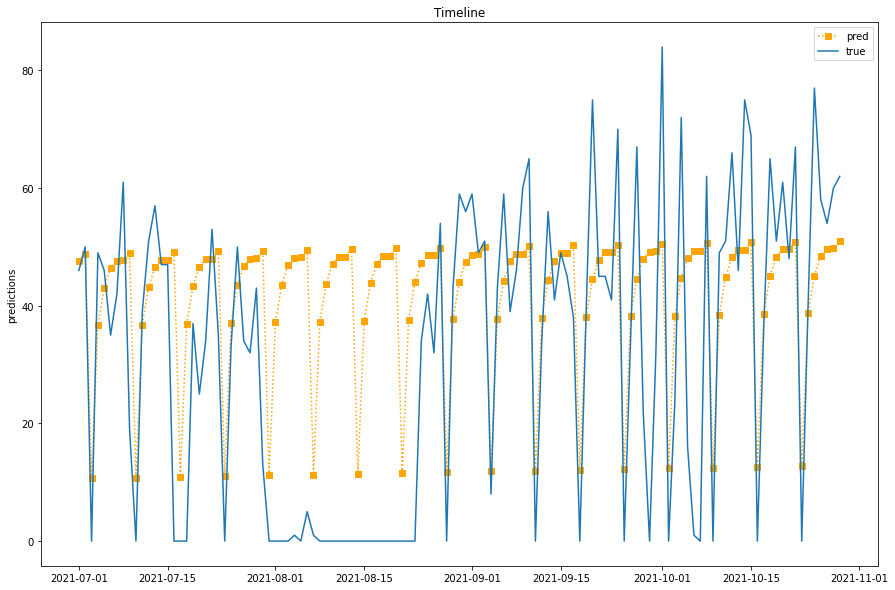

In [35]:
first_fb_pred.Y_TRUE = first_fb_pred.Y_TRUE.astype(float)
first_fb_pred.Y_PRED = first_fb_pred.Y_PRED.astype(float)
plt.figure(figsize=(15,10))

plt.plot(first_fb_pred["ds"], first_fb_pred["Y_PRED"], label='pred', c="orange", ls=':', marker='s')
plt.plot(first_fb_pred["ds"], first_fb_pred["Y_TRUE"], label='true')

plt.legend()
plt.title('Timeline')
plt.ylabel('predictions')

In [36]:
first_fb_pred_without_sunday = first_fb_pred[first_fb_pred["Y_TRUE"] != 0 ]
first_fb_pred_without_sunday["dif"] = first_fb_pred_without_sunday["Y_TRUE"] - first_fb_pred_without_sunday["Y_PRED"]
first_fb_pred_without_sunday.describe()

/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_50368/4144229514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_fb_pred_without_sunday["dif"] = first_fb_pred_without_sunday["Y_TRUE"] - first_fb_pred_without_sunday["Y_PRED"]


,Y_TRUE,Y_PRED,dif
count,84.000000,84.000000,84.000000
mean,45.369048,45.606513,-0.237466
std,17.764714,6.685612,16.540981
min,1.000000,11.317119,-48.312494
25%,35.000000,44.459556,-7.048481
50%,46.000000,47.926387,0.598246
75%,58.250000,49.145424,10.651579
max,84.000000,51.026347,33.485818


Text(0, 0.5, 'predictions')

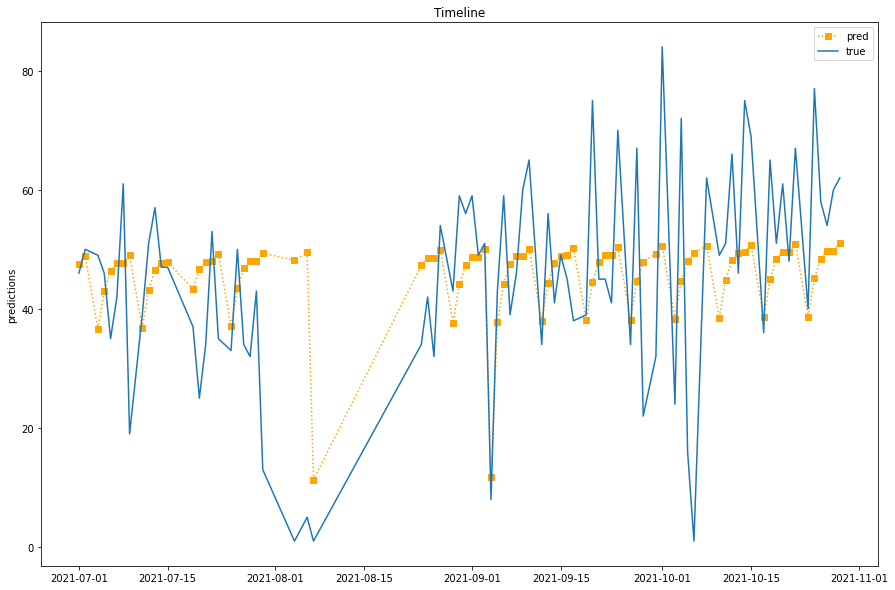

In [37]:
plt.figure(figsize=(15,10))

plt.plot(first_fb_pred_without_sunday["ds"], first_fb_pred_without_sunday["Y_PRED"], label='pred', c="orange", ls=':', marker='s')
plt.plot(first_fb_pred_without_sunday["ds"], first_fb_pred_without_sunday["Y_TRUE"], label='true')

plt.legend()
plt.title('Timeline')
plt.ylabel('predictions')

In [97]:
print(model.coef_)
print(model.intercept_)
print(model.score(X_test,y2_test))

[  0.03385785   0.10038268   0.15240747   3.00125296   6.09750974
   7.61999712   8.00973635   8.50038692 -29.79156571  -3.43731738]
31.362774787331958
0.23199892136727762


<AxesSubplot:>

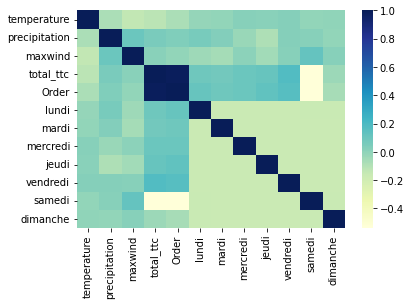

In [98]:
import seaborn as sns

# Heatmap
corr = result.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")


In [102]:
log_reg = LogisticRegression()

scores = cross_val_score(log_reg, X_train, y2_train, cv=10)

scores.mean()


/Users/mba049/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/Users/mba049/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mba049/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

0.13448275862068965

### Scaling

In [104]:
from sklearn.preprocessing import RobustScaler

In [105]:
X_train

,temperature,precipitation,maxwind,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche
2020-09-22,22.5,14.4,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-09-23,22.1,10.8,10.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-09-24,19.5,11.1,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-09-25,13.3,5.0,23.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-09-26,10.4,5.9,20.9,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-06-27,23.9,1.3,13.3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2021-06-28,24.5,1.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-29,20.9,3.0,11.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2021-06-30,20.0,0.3,5.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [107]:
scaler = RobustScaler()
scaler.fit(X_train[['temperature','precipitation','maxwind','lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche']]) # Fit and learn params for scaling
X_train[['temperature','precipitation','maxwind','lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche']] = scaler.transform(X_train[['temperature','precipitation','maxwind','lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche']]) # Apply to training
X_train

#model = LinearRegression() 
#model.fit(X_train, y2_train) # Train model

X_test[['temperature','precipitation','maxwind','lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche']] = scaler.transform(X_test[['temperature','precipitation','maxwind','lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche']]) # Apply to training
#preds = model.predict(X_test)


/Users/mba049/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/mba049/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


### Testing a dummy model 

In [111]:
from sklearn.dummy import DummyRegressor


In [112]:
baseline_model = DummyRegressor(strategy="mean") # Baseline
baseline_model.fit(X_train, y2_train) # Calculate value for stratgy
baseline_model.score(X_test, y2_test) 

-0.014286720761673699

### Testing a basic linear model

In [114]:
from sklearn.metrics import mean_squared_error

In [109]:
log_reg = LogisticRegression()

scores = cross_val_score(log_reg, X_test, y2_test, cv=10)

scores.mean()

/Users/mba049/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
/Users/mba049/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mba049/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
ST

0.26410256410256405

In [115]:
model = LinearRegression()
model = model.fit(X_train, y2_train)

y_pred = model.predict(X_test)

In [120]:
y2_train

2020-09-22    18.0
2020-09-23    31.0
2020-09-24    22.0
2020-09-25    45.0
2020-09-26    28.0
              ... 
2021-06-27    36.0
2021-06-28    58.0
2021-06-29    53.0
2021-06-30    52.0
2021-07-01    46.0
Freq: D, Name: Order, Length: 283, dtype: float64

In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import math

mse = mean_squared_error(y2_test, y_pred)

rmse = math.sqrt(mse)

mae = mean_absolute_error(y2_test, y_pred)

rsquared = r2_score(y2_test, y_pred)

max_error = max_error(y2_test, y_pred)

print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
print('Max Error =', round(max_error, 2))


MSE = 1323.71
RMSE = 36.38
MAE = 29.35
R2 = -1.03
Max Error = 78.63


In [128]:
X_test['y_pred'] = y_pred
X_test['y_true'] = y2_test
X_test.tail(50)

/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_49020/4234350068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_pred'] = y_pred
/var/folders/jp/43tqqk8n6vx93mnlkzb13g2w0000gn/T/ipykernel_49020/4234350068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['y_true'] = y2_test


,temperature,precipitation,maxwind,lundi,mardi,mercredi,jeudi,vendredi,samedi,dimanche,y_pred,y_true
2021-09-10,20.4,0.2,7.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,58.387465,65.0
2021-09-11,22.4,0.0,8.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,22.157412,0.0
2021-09-12,22.6,0.0,5.4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,44.276240,34.0
2021-09-13,24.3,0.0,7.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.816167,56.0
2021-09-14,19.4,1.6,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,58.962806,41.0
2021-09-15,24.3,0.6,22.3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,81.004974,49.0
2021-09-16,20.7,3.9,11.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,65.410733,45.0
2021-09-17,20.1,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,54.975072,38.0
2021-09-18,17.5,3.4,14.8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,31.896875,0.0
2021-09-19,14.0,7.8,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,56.494449,39.0


In [125]:
x = y2_test.index

Text(0, 0.5, 'predictions')

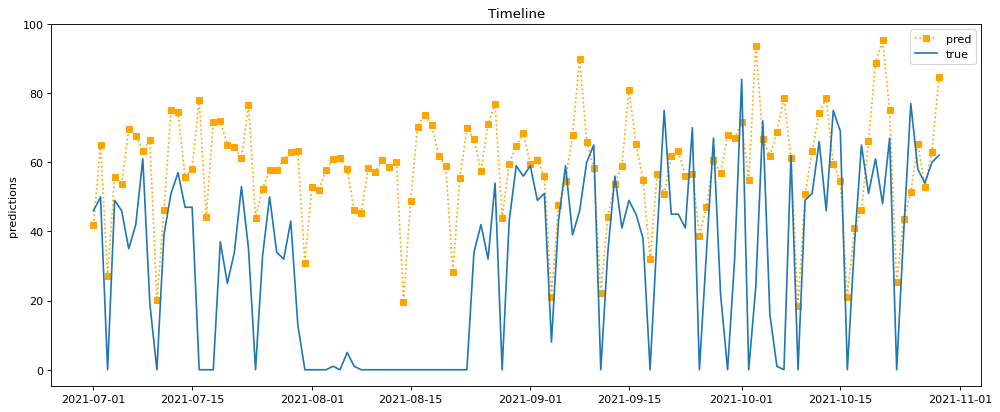

In [127]:
figure(figsize=(15, 6), dpi=80)
plt.plot(x,y_pred,label='pred', c="orange", ls=':', marker='s');
plt.plot(x,y2_test, label='true');
plt.legend()
plt.title('Timeline')
plt.ylabel('predictions')